# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Load all the data

In [3]:
files_train = ['data/2019-2020.csv', 'data/2020-2021.csv', 'data/2021-2022.csv', 
              'data/2022-2023.csv']

files_test = 'data/2023-2024.csv'

df_train = pd.DataFrame()

for file in files_train:
    temp = pd.read_csv(file)
    df_train = pd.concat([df_train, temp], axis = 0)

df_test = pd.read_csv(files_test)

print(df_train.shape)
print(df_test.shape)

(1520, 106)
(380, 106)


Understand the variables

In [4]:
variables = pd.DataFrame(columns=['Variable', 'Number of unique values', 'Values'])

for i, var in enumerate(df_train.columns):
    variables.loc[i] = [var, df_train[var].nunique, df_train[var].unique().tolist()]

variables

,Variable,Number of unique values,Values
0,Div,<bound method IndexOpsMixin.nunique of 0 ...,[E0]
1,Date,<bound method IndexOpsMixin.nunique of 0 ...,"[09/08/2019, 10/08/2019, 11/08/2019, 17/08/201..."
2,Time,<bound method IndexOpsMixin.nunique of 0 ...,"[20:00, 12:30, 15:00, 17:30, 14:00, 16:30, 19:..."
3,HomeTeam,<bound method IndexOpsMixin.nunique of 0 ...,"[Liverpool, West Ham, Bournemouth, Burnley, Cr..."
4,AwayTeam,<bound method IndexOpsMixin.nunique of 0 ...,"[Norwich, Man City, Sheffield United, Southamp..."
5,FTHG,<bound method IndexOpsMixin.nunique of 0 ...,"[4, 0, 1, 3, 2, 8, 5, 7, 6, 9]"
6,FTAG,<bound method IndexOpsMixin.nunique of 0 ...,"[1, 5, 0, 3, 2, 4, 9, 6, 7]"
7,FTR,<bound method IndexOpsMixin.nunique of 0 ...,"[H, A, D]"
8,HTHG,<bound method IndexOpsMixin.nunique of 0 ...,"[4, 0, 1, 2, 5, 3]"
9,HTAG,<bound method IndexOpsMixin.nunique of 0 ...,"[0, 1, 2, 3, 5, 4]"


### Data Dictionary

|**variable**   |**class**  |**description**|
|---------------|-----------|---------------|
|**Results Data**|
|Div            |String     |League Division|
|Date           |Datetime   |Match Date (dd/mm/yy)|
|Time           |Time       |Time of match kick off|
|HomeTeam       |String     |Home Team|
|AwayTeam       |String     |Away Team|
|FTHG and HG    |int        |Full Time Home Team Goals|
|FTAG and AG    |int        |Full Time Away Team Goals|
|FTR and Res    |String     |Full Time Result (H=Home Win, D=Draw, A=Away Win)|
|HTHG           |int        |Half Time Home Team Goals|
|HTAG           |int        |Half Time Away Team Goals
|HTR            |String     |Half Time Result (H=Home Win, D=Draw, A=Away Win)|
|Referee        |String     |Match Referee|
|HS             |int        |Home Team Shots|
|AS             |int        |Away Team Shots|
|HST            |int        |Home Team Shots on Target|
|AST            |int        |Away Team Shots on Target|
|HHW            |int        |Home Team Hit Woodwork
|AHW            |int        |Away Team Hit Woodwork
|HC             |int        |Home Team Corners
|AC             |int        |Away Team Corners
|HF             |int        |Home Team Fouls Committed
|AF             |int        |Away Team Fouls Committed
|HFKC           |int        |Home Team Free Kicks Conceded
|AFKC           |int        |Away Team Free Kicks Conceded
|HO             |int        |Home Team Offsides
|AO             |int        |Away Team Offsides
|HY             |int        |Home Team Yellow Cards
|AY             |int        |Away Team Yellow Cards
|HR             |int        |Home Team Red Cards
|AR             |int        |Away Team Red Cards
|HBP            |int        |Home Team Bookings Points (10 = yellow, 25 = red)
|ABP            |int        |Away Team Bookings Points (10 = yellow, 25 = red)
|B365H          |float      |Bet365 home win odds
|B365D          |float      |Bet365 draw odds
|B365A          |float      |Bet365 away win odds
|PSH            |float      |Pnnacle home win odds
|PSD            |float      |Pnnacle draw odds
|PSA            |float      |Pnnacle away win odds
|VCH            |float      |VC Bet home win odds
|VCD            |float      |VC Bet draw odds
|VCA            |float      |VC Bet away win odds
|WHH            |float      |William Hill home win odds
|WHD            |float      |William Hill draw odds
|WHA            |float      |William Hill away win odds

Note that Free Kicks Conceded includes fouls, offsides and any other offense committed and will always be equal to or higher than the number of fouls. Fouls make up the vast majority of Free Kicks Conceded. Free Kicks Conceded are shown when specific data on Fouls are not available (France 2nd, Belgium 1st and Greece 1st divisions).

### Let's explore some interesting questions
* Can we train machine learning models to find out who wins a game?
* Will adding betting odds increase or decrease our models' performance?

# Explatory Data Analysis (EDA)

First of all, let's filter our dataframe by some match statistics before the game to train our models and make predictions

In [5]:
df_score_train = df_train[["Time", "HomeTeam", "AwayTeam", "Referee", "FTR"]]
df_score_test = df_test[["Time", "HomeTeam", "AwayTeam", "Referee", "FTR"]]


df_score_train.head()

,Time,HomeTeam,AwayTeam,Referee,FTR
0,20:00,Liverpool,Norwich,M Oliver,H
1,12:30,West Ham,Man City,M Dean,A
2,15:00,Bournemouth,Sheffield United,K Friend,D
3,15:00,Burnley,Southampton,G Scott,H
4,15:00,Crystal Palace,Everton,J Moss,D


Now let's ensure there are no nulls:

In [6]:
df_score_train.isnull().sum()

Time        0
HomeTeam    0
AwayTeam    0
Referee     0
FTR         0
dtype: int64

In [7]:
df_score_test.isnull().sum()

Time        0
HomeTeam    0
AwayTeam    0
Referee     0
FTR         0
dtype: int64

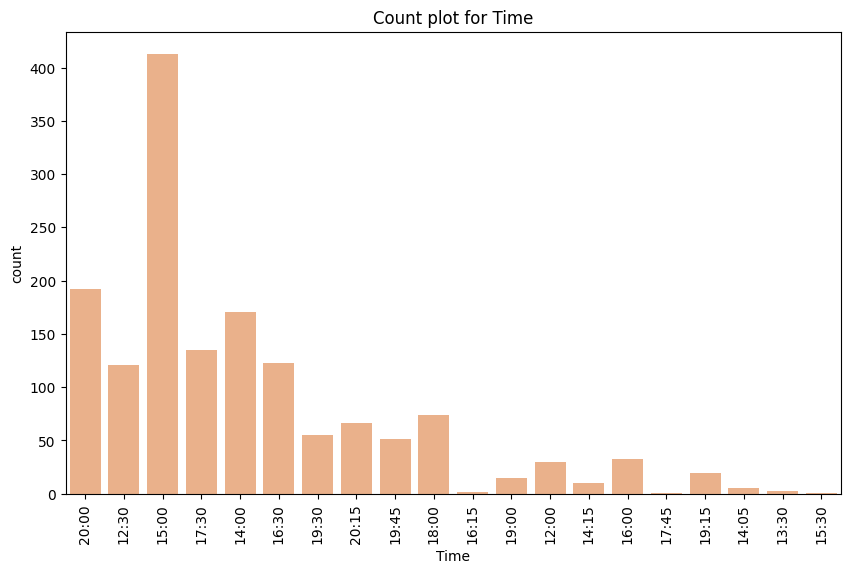

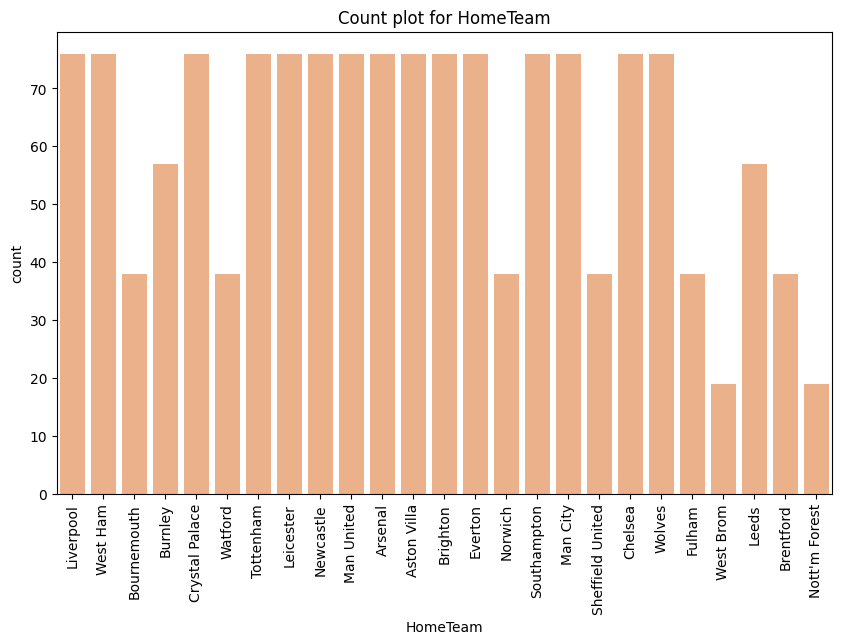

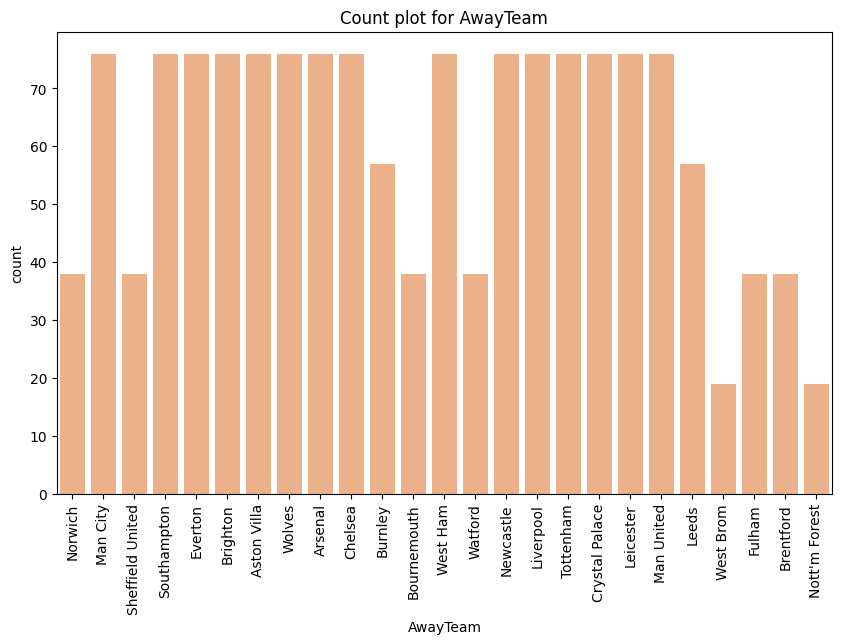

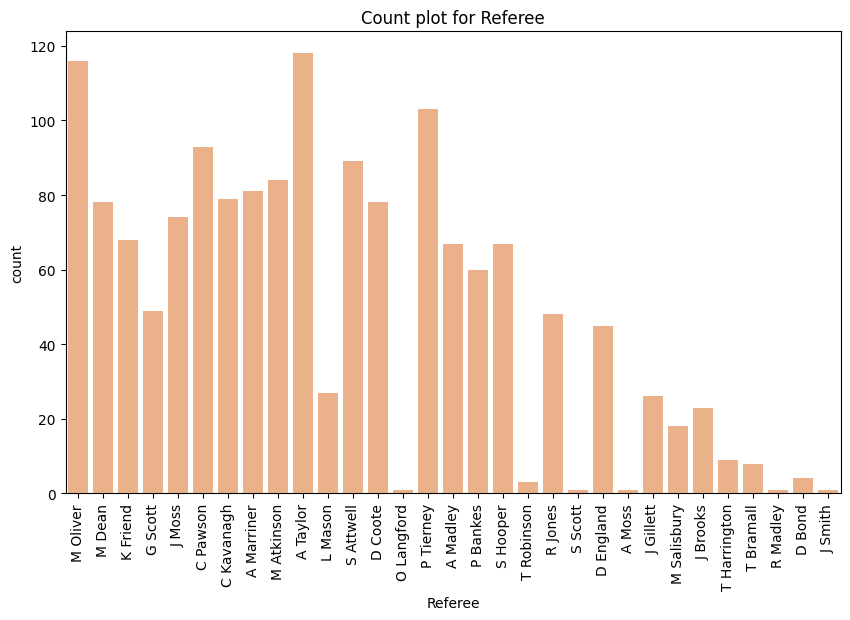

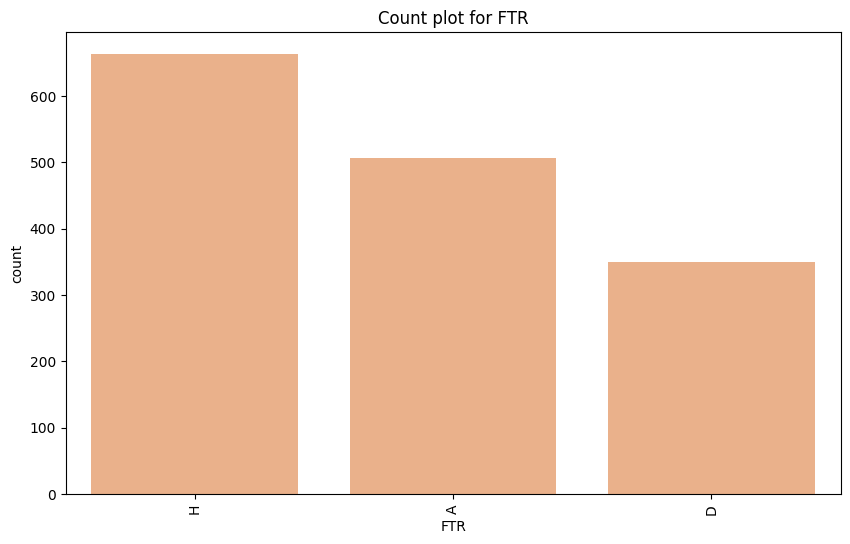

In [8]:
cols = ["Time", "HomeTeam", "AwayTeam", "Referee", "FTR"]

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x = col, data=df_score_train, palette=["#FAAE7B"])
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation = 90)
    plt.show()

Merge the training data with the validation data in order to do one-hot encoding and get consistent columns

In [9]:
print(df_score_train.shape)
print(df_score_test.shape)

train_res = df_score_train['FTR']
test_res = df_score_test['FTR']

print(df_score_train.columns)

df_score = pd.concat([df_score_train.drop('FTR', axis=1), df_score_test.drop('FTR', axis=1)])
df_score = pd.get_dummies(df_score)

print(df_score.columns)

(1520, 5)
(380, 5)
Index(['Time', 'HomeTeam', 'AwayTeam', 'Referee', 'FTR'], dtype='object')
Index(['Time_12:00', 'Time_12:30', 'Time_13:00', 'Time_13:30', 'Time_14:00',
       'Time_14:05', 'Time_14:15', 'Time_15:00', 'Time_15:30', 'Time_15:45',
       ...
       'Referee_R Welch', 'Referee_S Allison', 'Referee_S Attwell',
       'Referee_S Barrott', 'Referee_S Hooper', 'Referee_S Scott',
       'Referee_S Singh', 'Referee_T Bramall', 'Referee_T Harrington',
       'Referee_T Robinson'],
      dtype='object', length=112)


Once that's done, we can seperate the train and test datasets back.

In [10]:
df_score_train_oh = df_score.iloc[:df_score_train.shape[0]]
df_score_test_oh = df_score.iloc[df_score_train.shape[0]:]

df_score_train_oh.insert(df_score_train_oh.shape[1], 'FTR', train_res, True)
df_score_test_oh.insert(df_score_test_oh.shape[1], 'FTR', test_res, True)

print(df_score_train.shape)
print(df_score_test.shape)
print(df_score_train_oh.columns)

(1520, 5)
(380, 5)
Index(['Time_12:00', 'Time_12:30', 'Time_13:00', 'Time_13:30', 'Time_14:00',
       'Time_14:05', 'Time_14:15', 'Time_15:00', 'Time_15:30', 'Time_15:45',
       ...
       'Referee_S Allison', 'Referee_S Attwell', 'Referee_S Barrott',
       'Referee_S Hooper', 'Referee_S Scott', 'Referee_S Singh',
       'Referee_T Bramall', 'Referee_T Harrington', 'Referee_T Robinson',
       'FTR'],
      dtype='object', length=113)


We can move on to export our data and build our prediction models in subsequent scripts.

In [12]:
prepared_path = 'prepared_data' 
if not os.path.exists(prepared_path):
    os.makedirs(prepared_path)

csv_train_data = df_score_train_oh.to_csv('prepared_data/train_data.csv')
csv_test_data = df_score_test_oh.to_csv('prepared_data/test_data.csv')

# Add betting odds

Now let's add the win odds from the following sports betting websites to see if they impact our training accuracy: Bet365, William Hill, VC Bet, and Pinnacle.

In [13]:
df_bets_train = df_train[["Time", "HomeTeam", "AwayTeam", "Referee", "FTR", "B365H", "B365D", "B365A", "WHH", "WHD", "WHA", "VCH", "VCD", "VCA", "PSH", "PSD", "PSA"]]
df_bets_test = df_test[["Time", "HomeTeam", "AwayTeam", "Referee", "FTR", "B365H", "B365D", "B365A", "WHH", "WHD", "WHA", "VCH", "VCD", "VCA", "PSH", "PSD", "PSA"]]


df_bets_train.head()

,Time,HomeTeam,AwayTeam,Referee,FTR,B365H,B365D,B365A,WHH,WHD,WHA,VCH,VCD,VCA,PSH,PSD,PSA
0,20:00,Liverpool,Norwich,M Oliver,H,1.14,10.00,19.00,1.12,8.5,21.00,1.14,9.5,23.00,1.15,9.59,18.05
1,12:30,West Ham,Man City,M Dean,A,12.00,6.50,1.22,13.00,6.0,1.24,12.00,6.5,1.25,11.68,6.53,1.26
2,15:00,Bournemouth,Sheffield United,K Friend,D,1.95,3.60,3.60,2.00,3.5,3.80,2.00,3.6,4.00,2.04,3.57,3.90
3,15:00,Burnley,Southampton,G Scott,H,2.62,3.20,2.75,2.70,3.2,2.75,2.70,3.3,2.80,2.71,3.31,2.81
4,15:00,Crystal Palace,Everton,J Moss,D,3.00,3.25,2.37,3.10,3.3,2.35,3.20,3.3,2.45,3.21,3.37,2.39


For the new betting values, since their columns are numerical, we'll use a StandardScalar to standardize our values.

In [14]:
from sklearn.preprocessing import StandardScaler

train_bets = df_bets_train[["B365H", "B365D", "B365A", "WHH", "WHD", "WHA", "VCH", "VCD", "VCA", "PSH", "PSD", "PSA"]]
test_bets = df_bets_test[["B365H", "B365D", "B365A", "WHH", "WHD", "WHA", "VCH", "VCD", "VCA", "PSH", "PSD", "PSA"]]

scalar = StandardScaler()

train_bets_scaled = scalar.fit_transform(train_bets)
test_bets_scaled = scalar.fit_transform(test_bets)

train_bets_scaled_df = pd.DataFrame(train_bets_scaled, columns = train_bets.columns)
test_bets_scaled_df = pd.DataFrame(test_bets_scaled, columns = test_bets.columns)

train_bets_scaled_df.head()

,B365H,B365D,B365A,WHH,WHD,WHA,VCH,VCD,VCA,PSH,PSD,PSA
0,-0.844800,4.300413,3.695748,-0.837111,3.531544,3.734059,-0.803475,4.058224,3.975825,-0.839899,3.786089,2.938242
1,4.177448,1.704005,-0.835749,4.465857,1.533077,-0.778242,3.820931,1.798220,-0.758577,3.788418,1.597254,-0.775048
2,-0.470212,-0.447305,-0.229170,-0.444299,-0.465390,-0.193653,-0.437270,-0.386451,-0.159974,-0.448712,-0.520051,-0.191183
3,-0.160368,-0.744037,-0.445806,-0.131834,-0.705207,-0.433426,-0.139196,-0.612451,-0.421183,-0.154222,-0.706030,-0.432249
4,0.015364,-0.706945,-0.542654,0.046717,-0.625268,-0.524768,0.073715,-0.612451,-0.497369,0.065546,-0.663112,-0.525136


Do one-hot-encoding on the categorical columns like previously.

In [15]:
print(df_bets_train.shape)
print(df_bets_test.shape)

train_res = df_bets_train['FTR']
test_res = df_bets_test['FTR']

print(df_bets_train.columns)

df_score = pd.concat([df_bets_train.drop(['FTR', "B365H", "B365D", "B365A", "WHH", "WHD", "WHA", "VCH", "VCD", "VCA", "PSH", "PSD", "PSA"], axis=1), 
                      df_bets_test.drop(['FTR', "B365H", "B365D", "B365A", "WHH", "WHD", "WHA", "VCH", "VCD", "VCA", "PSH", "PSD", "PSA"], axis=1)])
df_score = pd.get_dummies(df_score)

print(df_score.columns)

(1520, 17)
(380, 17)
Index(['Time', 'HomeTeam', 'AwayTeam', 'Referee', 'FTR', 'B365H', 'B365D',
       'B365A', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSH', 'PSD', 'PSA'],
      dtype='object')
Index(['Time_12:00', 'Time_12:30', 'Time_13:00', 'Time_13:30', 'Time_14:00',
       'Time_14:05', 'Time_14:15', 'Time_15:00', 'Time_15:30', 'Time_15:45',
       ...
       'Referee_R Welch', 'Referee_S Allison', 'Referee_S Attwell',
       'Referee_S Barrott', 'Referee_S Hooper', 'Referee_S Scott',
       'Referee_S Singh', 'Referee_T Bramall', 'Referee_T Harrington',
       'Referee_T Robinson'],
      dtype='object', length=112)


Add all the columns back together.

In [16]:
df_bets_train_oh = df_score.iloc[:df_bets_train.shape[0]]
df_bets_test_oh = df_score.iloc[df_bets_train.shape[0]:]

df_bets_train_oh = df_bets_train_oh.reset_index(drop=True)
df_bets_test_oh = df_bets_test_oh.reset_index(drop=True)

train_res = train_res.reset_index(drop=True)
test_res = test_res.reset_index(drop=True)

df_bets_train_oh = pd.concat([df_bets_train_oh, train_bets_scaled_df, train_res], axis=1)
df_bets_test_oh = pd.concat([df_bets_test_oh, test_bets_scaled_df, test_res], axis=1)

print(df_bets_train_oh.shape)
print(df_bets_test_oh.shape)
print(df_bets_train_oh.columns)

(1520, 125)
(380, 125)
Index(['Time_12:00', 'Time_12:30', 'Time_13:00', 'Time_13:30', 'Time_14:00',
       'Time_14:05', 'Time_14:15', 'Time_15:00', 'Time_15:30', 'Time_15:45',
       ...
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSH', 'PSD', 'PSA', 'FTR'],
      dtype='object', length=125)


Save as CSV files to be trained and tested.

In [18]:
csv_train_bets_data = df_bets_train_oh.to_csv('prepared_data/train_bets_data.csv')
csv_test_bets_data = df_bets_test_oh.to_csv('prepared_data/test_bets_data.csv')